In [2]:
# Assignment 8 
# Anirudh Sathish 
# CS20B1125

In [3]:
# libs 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

In [4]:
# Taking size of image 
size = 100

# creating required image 
# Create an empty image with all zeros
image = np.zeros((size, size))


# Set the intensity values of the inner square
inner_size = 50
inner_start = (size - inner_size) // 2
inner_end = inner_start + inner_size
image[inner_start:inner_end, inner_start:inner_end] = 125

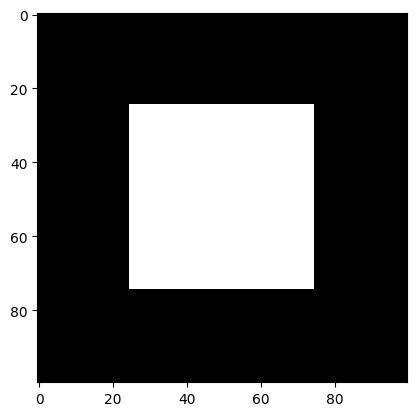

In [5]:
plt.imshow(image,cmap='gray')

In [6]:
img = image.copy()
row_proj = np.sum(img, axis=1)
col_proj = np.sum(img, axis=0)
row_proj.shape,col_proj.shape

diag_proj_45 = np.zeros((img.shape[0] + img.shape[1] - 1,), dtype=np.int64)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        diag_proj_45[i+j] += img[i,j]
diag_proj_45.shape

diag_proj_135 = np.zeros((img.shape[0] + img.shape[1] - 1,), dtype=np.int64)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        diag_proj_135[i-j+img.shape[1]-1] += img[i,j]
diag_proj_135.shape

(199,)

In [7]:
recv_img = np.zeros((img.shape[0],img.shape[1]))

In [16]:
# add row projection to this 
# Back project the row projection along each row of the projection image
recv_row = np.zeros((img.shape[0],img.shape[1]))
for i in range(recv_row.shape[0]):
    for j in range(recv_row.shape[1]):
        recv_row[i,j] = row_proj[i]
recv_row = recv_row/img.shape[0]

In [17]:
# now we have already added row , lets add column to this 
recv_col = np.zeros((img.shape[0],img.shape[1])) 
for i in range(recv_col.shape[0]):
    for j in range(recv_col.shape[1]):
        recv_col[i,j] += col_proj[j]
recv_col = recv_col/img.shape[0]

In [18]:
# now we have added row and column , let us add the diag 45 as well
recv_45 = np.zeros((img.shape[0],img.shape[1])) 
for i in range(len(diag_proj_45)):
    for j in range(img.shape[0]):
        x = i - j
        if x >= 0 and x< img.shape[0]:
            recv_45[x,j] += diag_proj_45[i]
recv_45 = recv_45/len(diag_proj_45)

In [19]:
# now we have added row and column , let us add the diag 135 as well
recv_135 = np.zeros((img.shape[0],img.shape[1])) 
for i in range(len(diag_proj_135)):
    for j in range(img.shape[0]):
        x = i - (img.shape[1]-1) - j
        if x >= 0 and x < img.shape[0]:
            recv_135[x, j] += diag_proj_135[i]
recv_135 = recv_135/len(diag_proj_135)

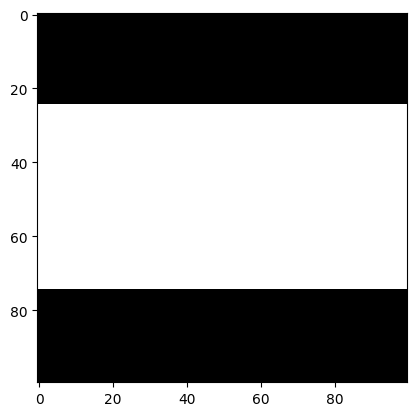

In [20]:
# part 1 
part1 = recv_row
plt.imshow(part1,cmap = 'gray')

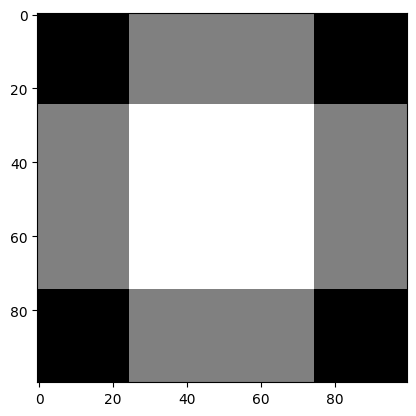

In [21]:
# part2 
part2 = (recv_row+recv_col)/2
plt.imshow(part2,cmap = 'gray')

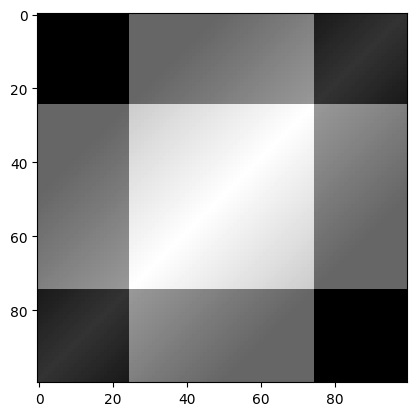

In [22]:
# let us get for rows , column and 45 
part3_recv = (recv_col+ recv_row+ recv_45)/3
plt.imshow(part3_recv,cmap = 'gray')

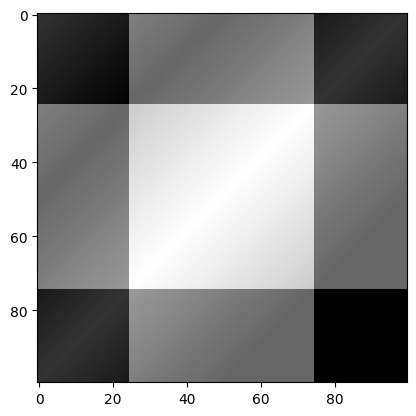

In [23]:
# let us get for rows , column , 45 and 135  
part4_recv = (recv_col + recv_row + recv_45+recv_135)/4
plt.imshow(part4_recv,cmap = 'gray')